<a href="https://colab.research.google.com/github/royerlozano/CUADERNO-DE-ROYER/blob/main/guide4extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ingrese el limite inferior: 1
ingrese el limite superior: 2
0.5669089119214953


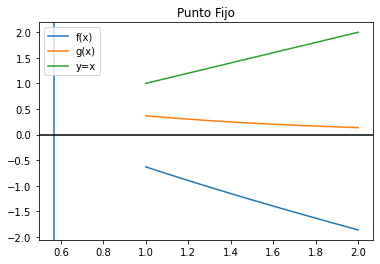

In [7]:
# Algoritmo de punto fijo
# [a,b] intervalo de búsqueda
# error = tolera

import numpy as np

def puntofijo(gx,a,tolera, iteramax = 15):
    i = 1 # iteración
    b = gx(a)
    tramo = abs(b-a)
    while(tramo>=tolera and i<=iteramax ):
        a = b
        b = gx(a)
        tramo = abs(b-a)
        i = i + 1
    respuesta = b
    
    # Validar respuesta
    if (i>=iteramax ):
        respuesta = np.nan
    return(respuesta)

# PROGRAMA ---------

# INGRESO
a = int(input("ingrese el limite inferior: "))      # intervalo
b = int(input("ingrese el limite superior: ")) 
fx = lambda x: np.exp(-x) - x
gx = lambda x: np.exp(-x)
tolera = 0.001
iteramax = int(input("ingrese el numero de iteraciones maximas: "))  # itera máximo
muestras = 51  # gráfico
tramos = 50

# PROCEDIMIENTO
respuesta = puntofijo(gx,a,tolera)

# SALIDA
print(respuesta)

# GRAFICA
# calcula los puntos para fx y gx
xi = np.linspace(a,b,muestras)
fi = fx(xi)
gi = gx(xi)
yi = xi

import matplotlib.pyplot as plt

plt.plot(xi,fi, label='f(x)')
plt.plot(xi,gi, label='g(x)')
plt.plot(xi,yi, label='y=x')

if (respuesta!= np.nan):
    plt.axvline(respuesta)
plt.axhline(0, color='k')
plt.title('Punto Fijo')
plt.legend()
plt.show()

In [14]:
import sympy as sp
import numpy as np
import pandas as pd
x=sp.symbols('x')

def funcion(ecua='x+2'):
    global x
    return sp.sympify(ecua)
""" ecuacion tipo: string
    x_0: valor inicial tipo:float
    e_s tolerancia estimada tipo:float"""
def MetodoPF(ecuacion,x_0,es):
    global x
    ecuacion=funcion(ecuacion)+x #tal q sea g(x)
    ea=100
    x_r=x_0 #x_i+1
    iteracion=0 #inicio del contador en 0
    while ea>es:
        x_anterior=x_r# x_anterior = x_i
        x_r=ecuacion.evalf(subs={x:x_anterior})#xr=g(x_anterior)
        iteracion+=1#contador incrementado en 1
        if x_r !=0:
            ea=abs((x_r-x_anterior)/x_r)*100
    return x_r
#iniamos el programa con lo siguiente parametros
a=MetodoPF('exp(-x)-x',0,0.01)
print(a)

0.567157044001298


In [16]:
import sympy as sp
import numpy as np
import pandas as pd
x=sp.symbols('x')

def funcion(ecua='x+2'):
    global x
    return sp.sympify(ecua)
""" ecuacion tipo: string
    x_0: valor inicial tipo:float
    e_s tolerancia estimada tipo:float"""
def MetodoPF(ecuacion,x_0,es):
    global x
    ecuacion=funcion(ecuacion)
    derivada=sp.diff(ecuacion)
    f_NR=x-(ecuacion/derivada)#formula de Newton Rhapson
    ea=100 #error aproximado 100%
    x_r=x_0 #x_i+1
    while ea>es:
        x_anterior=x_r# x_anterior = x_i
        x_r=f_NR.evalf(subs={x:x_anterior})
        if x_r !=0:
            ea=abs((x_r-x_anterior)/x_r)*100
        print(x_r,ea)
    return x_r
#iniamos el programa con lo siguiente parametros
a=MetodoPF('exp(-x)-x',0,0.01)
print("raiz aproximada: ",a)

0.500000000000000 100.000000000000
0.566311003197218 11.7092909766624
0.567143165034862 0.146728707837439
0.567143290409781 2.21063919843976e-5
raiz aproximada:  0.567143290409781
